In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv("stroke.csv")

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
df.shape

(5110, 12)

In [19]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
bmi_mean=df["bmi"].mean()
df['bmi'].fillna(value=bmi_mean,inplace=True)
bmi_mean

28.893236911794673

In [21]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
df.drop('id', axis=1, inplace=True)

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age', ylabel='Density'>

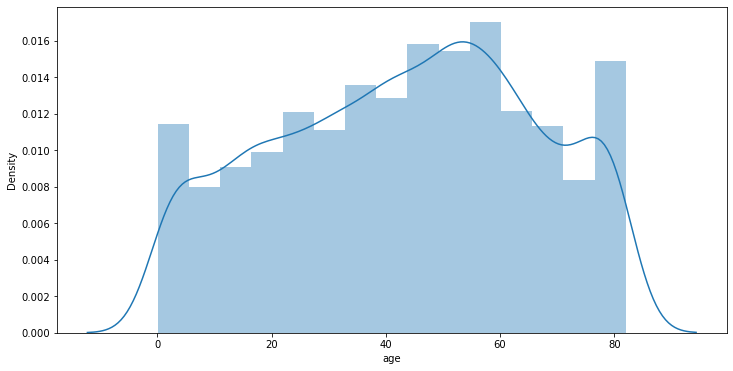

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(df['age'], bins=15)

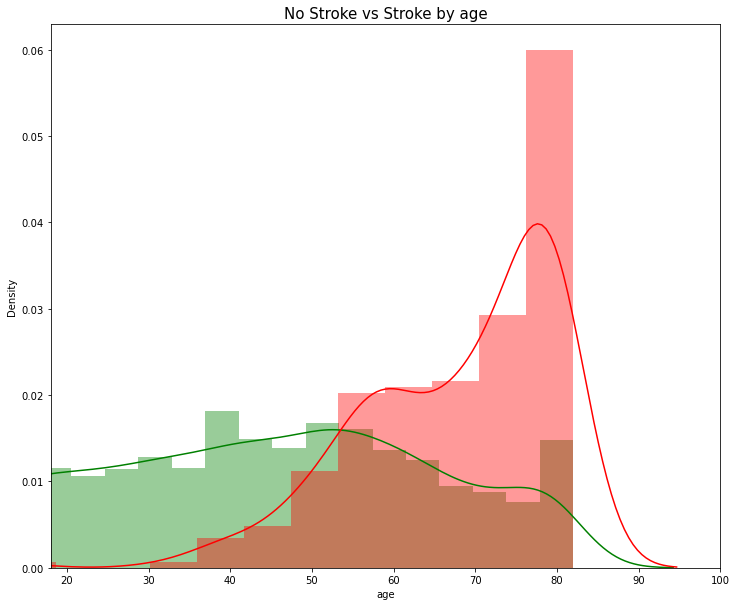

In [25]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke']==0]['age'], color='green')
sns.distplot(df[df['stroke']==1]['age'], color='red')
plt.title("No Stroke vs Stroke by age",fontsize=15 )
plt.xlim([18,100])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

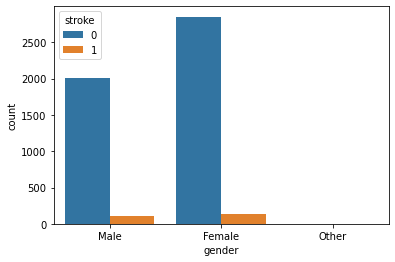

In [26]:
sns.countplot(x='gender', data=df, hue="stroke")

In [27]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [28]:
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

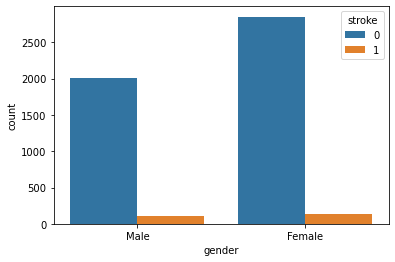

In [29]:
sns.countplot(x='gender',data=df,hue='stroke')

0    4860
1     249
Name: stroke, dtype: int64

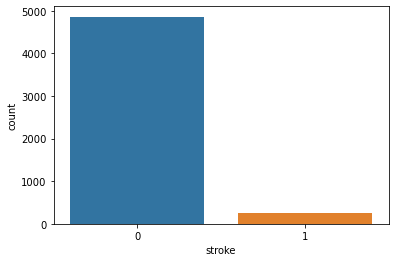

In [30]:
sns.countplot(x='stroke',data=df)
df.stroke.value_counts()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

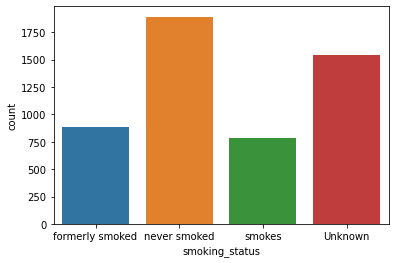

In [31]:
sns.countplot(x='smoking_status',data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

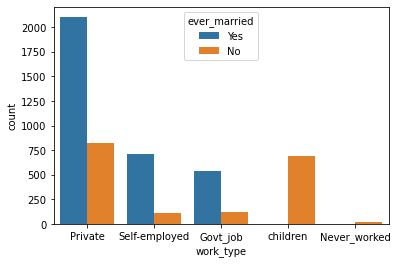

In [32]:
sns.countplot(x='work_type',hue='ever_married',data=df)

In [33]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [36]:
l_e=LabelEncoder()
X[:,0]=l_e.fit_transform(X[:,0])
X[:,4]=l_e.fit_transform(X[:,4])
X[:,6]=l_e.fit_transform(X[:,6])

In [37]:
c_t=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[5,9])], remainder='passthrough')
X=np.array(c_t.fit_transform(X))

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4087, 17), (4087,), (1022, 17), (1022,))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [44]:
print(sum(y_train==1))
print(sum(y_train==0))

187
3900


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote=SMOTE(random_state=42)
X_train, y_train=smote.fit_resample(X_train, y_train.ravel())

In [47]:
print(X_train.shape)
print(y_train.shape)
print(sum(y_train==1))
print(sum(y_train==0))

(7800, 17)
(7800,)
3900
3900


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.linear_model import LogisticRegression


In [51]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
score=cross_val_score(model, X_train, y_train, cv=6)
precision=precision_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print("train score of LogisticRegression is", score.mean()*100,"%")
print("-----")
print("Precision Score is", precision)
print("-----")
print("ROC Score is", roc)
print("-----")
print("Recall score is", recall)

train score of LogisticRegression is 79.06410256410257 %
-----
Precision Score is 0.1649122807017544
-----
ROC Score is 0.7550739247311828
-----
Recall score is 0.7580645161290323
